In [22]:
import anndata
import pandas as pd
import seaborn as sns
import cstarpy
import os
import numpy as np
from cstarpy.separation import CellStateTransition

In [9]:
dpd_scores_high_dim_pmr=pd.read_pickle('~/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_svm_dpd_stvs/tumor_normal/dpd_tmr_nml.pkl')
dpd_scores_high_dim_tmr=pd.read_pickle('~/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_svm_dpd_stvs/primary_recurrent/dpd_pmr_rct.pkl')

In [12]:
dpd_scores_high_dim_pmr.reset_index(inplace=True)

In [13]:
dpd_scores_high_dim_tmr.reset_index(inplace=True)

In [14]:
dpd_all=dpd_scores_high_dim_pmr.merge(dpd_scores_high_dim_tmr,on='index_clean')

In [15]:
dpd_all

,index_clean,DPD_tmr_nml,DPD_pmr_rct
0,GSM5319548_AAACCCACAAGAGGCT-1,-2.470924,7.263390
1,GSM5319548_AAACGAAAGCAGTAAT-1,-2.222032,9.023294
2,GSM5319548_AAACGAATCGTTCCTG-1,-1.775210,5.678054
3,GSM5319548_AAACGCTCAAATGAGT-1,-1.424218,7.815950
4,GSM5319548_AAACGCTCAGCCCAGT-1,-1.078401,5.793028
...,...,...,...
54599,GSM5319532_TTTGGTTGTGTCCTAA-1,3.836515,3.559528
54600,GSM5319532_TTTGGTTTCACACCCT-1,4.198556,3.630000
54601,GSM5319532_TTTGGTTTCATTATCC-1,3.570304,3.922781
54602,GSM5319532_TTTGGTTTCCCTCGTA-1,3.789141,4.027520


In [16]:
dpd_scores_high_dim_final=pd.read_pickle('~/Phd_project/project_GBM/gbm_OUTPUT/dpd_scores_high_dim_final.pkl')

In [17]:
dpd_scores_high_dim_final

,index_clean,DPD_pmr_rct,Barcodes,Patients_id,Tumor_Normal_annotation,zeros
0,GSM5319518_AAACCCAAGGGATCAC-1,-5.883107,AAACCCAAGGGATCAC-1,SF2777,Tumor,0
1,GSM5319518_AAACCCAGTCGATTTG-1,-6.362737,AAACCCAGTCGATTTG-1,SF2777,Tumor,0
2,GSM5319518_AAACCCAGTCGTCAGC-1,-6.534347,AAACCCAGTCGTCAGC-1,SF2777,Tumor,0
3,GSM5319518_AAACCCAGTTGTAAAG-1,-10.943374,AAACCCAGTTGTAAAG-1,SF2777,Tumor,0
4,GSM5319518_AAACCCATCTATCGGA-1,-9.237209,AAACCCATCTATCGGA-1,SF2777,Tumor,0
...,...,...,...,...,...,...
55931,GSM5319532_TTTGGTTTCATTATCC-1,3.922781,TTTGGTTTCATTATCC-1,SF9494,Normal,0
55932,GSM5319532_TTTGGTTTCCCTCGTA-1,4.027520,TTTGGTTTCCCTCGTA-1,SF9494,Normal,0
55933,GSM5319532_TTTGTTGTCAGACAAA-1,6.528109,TTTGTTGTCAGACAAA-1,SF9494,Tumor,0
55934,GSM5319532_TTTGTTGTCCATTGGA-1,6.042014,TTTGTTGTCCATTGGA-1,SF9494,Normal,0


In [18]:
dpd_all_df=dpd_all.merge(dpd_scores_high_dim_final[['index_clean','Patients_id','Tumor_Normal_annotation']],on='index_clean')

In [20]:
dpd_all_df.set_index('index_clean',inplace=True)

In [21]:
dpd_all_df

,DPD_tmr_nml,DPD_pmr_rct,Patients_id,Tumor_Normal_annotation
index_clean,,,,
GSM5319548_AAACCCACAAGAGGCT-1,-2.470924,7.263390,SF2979,Tumor
GSM5319548_AAACGAAAGCAGTAAT-1,-2.222032,9.023294,SF2979,Tumor
GSM5319548_AAACGAATCGTTCCTG-1,-1.775210,5.678054,SF2979,Tumor
GSM5319548_AAACGCTCAAATGAGT-1,-1.424218,7.815950,SF2979,Tumor
GSM5319548_AAACGCTCAGCCCAGT-1,-1.078401,5.793028,SF2979,Tumor
...,...,...,...,...
GSM5319532_TTTGGTTGTGTCCTAA-1,3.836515,3.559528,SF9494,Normal
GSM5319532_TTTGGTTTCACACCCT-1,4.198556,3.630000,SF9494,Normal
GSM5319532_TTTGGTTTCATTATCC-1,3.570304,3.922781,SF9494,Normal


In [49]:
dpd_all_df

,DPD_tmr_nml,DPD_pmr_rct,Patients_id,Tumor_Normal_annotation,Stage
index_clean,,,,,
GSM5319548_AAACCCACAAGAGGCT-1,-2.470924,7.263390,SF2979,Tumor,Recurrent
GSM5319548_AAACGAAAGCAGTAAT-1,-2.222032,9.023294,SF2979,Tumor,Recurrent
GSM5319548_AAACGAATCGTTCCTG-1,-1.775210,5.678054,SF2979,Tumor,Recurrent
GSM5319548_AAACGCTCAAATGAGT-1,-1.424218,7.815950,SF2979,Tumor,Recurrent
GSM5319548_AAACGCTCAGCCCAGT-1,-1.078401,5.793028,SF2979,Tumor,Recurrent
...,...,...,...,...,...
GSM5319532_TTTGGTTGTGTCCTAA-1,3.836515,3.559528,SF9494,Normal,Recurrent
GSM5319532_TTTGGTTTCACACCCT-1,4.198556,3.630000,SF9494,Normal,Recurrent
GSM5319532_TTTGGTTTCATTATCC-1,3.570304,3.922781,SF9494,Normal,Recurrent


<Axes: xlabel='DPD_tmr_nml', ylabel='DPD_pmr_rct'>

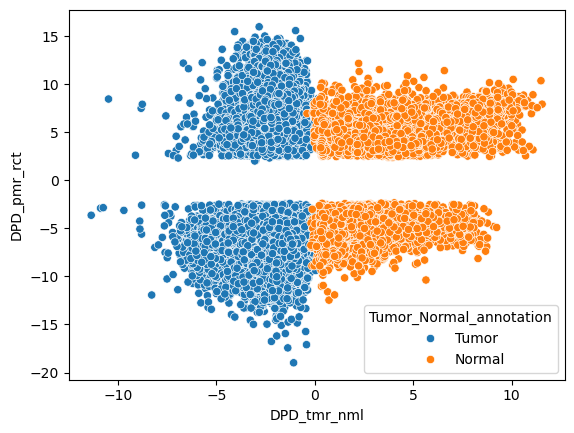

In [50]:
sns.scatterplot(x='DPD_tmr_nml',y='DPD_pmr_rct',data=dpd_all_df,hue='Tumor_Normal_annotation')

In [36]:
dpd_all_df['Stage']='Recurrent'

In [45]:
dpd_all_df.loc[dpd_all_df['Patients_id'].str.contains('9798'),'Stage']='Primary'

In [47]:
dpd_all_df.to_pickle('~/Phd_project/project_GBM/gbm_OUTPUT/dpd_scores_all_high_dim_annotated.pkl')